In [202]:
import pandas as pd

import sys
import os
import shutil
import re

import numpy as np
import pandas as pd

from skimage import io
import cv2
import PIL as Image
from scipy import ndimage, misc
import matplotlib.pyplot as plt
%matplotlib inline
import fnmatch

import Augmentor

sys.path.append("../")

from utils import myImg2 as myimg
from utils import config as cutil


In [203]:
#initialize key variables.

cdir = '/disk1/data1/ret/gpu_tf/'
ddir = '/disk1/data1/data/'
imgdir = ddir  + 'px_he1/'
o_imgdir = ddir + 'ex/'
model_dir = ddir + 'models/inception/'
model_name = 'incep_lab_he77.cpkt'
iconfig = cutil.Config(configid='c1',cdir=cdir)

In [204]:
#get Image
def get_img(ipath):
    return myimg.myImg( imageid=ipath, config=iconfig, path=ipath)


In [205]:
#get image form npy
def get_img_from_npy(ipath):
    return np.load(ipath)

In [206]:
#display patches
def show_patch(img_id,patch_id):
    '''
    oi_im = get_img_from_npy( imgdir + img_id + '_' + patch_id + '_oi.npy')
    ti_im = get_img_from_npy( imgdir + img_id + '_' + patch_id + '_ti.npy')
    '''
    for i in range(4000):
      if os.path.exists(imgdir + img_id + '_' + str(i) + '.jpg'):
        oi_im = get_img_from_npy( imgdir + img_id + '_' + str(i) + '_oi.npy')
        ti_im = get_img_from_npy( imgdir + img_id + '_' + str(i) + '_ti.npy')
        if (ti_im/255).sum() > 5000:
            print("img_id[{}] sum ti_im[{}] size ti_im[{}] max pi[{}]".
                  format(img_id + '_' + str(i),ti_im.sum()/255,ti_im.shape,ti_im.max())) 
            #ti2 = ndimage.zoom(ti_im,2)
            show_images([oi_im.astype(np.uint8),ti_im.astype(np.uint8),ti2.astype(np.uint8)])
            break
    
    '''
    #stack images side by side
    img_hstack = np.hstack((oi_im, ti_im))
    img_hconcat = np.concatenate((oi_im, ti_im), axis=1)
    cv2.imshow(' img_hconcat patch - [' + str(i) + ']', img_hconcat.astype(np.float32)/255) 
    '''
    #show_images([oi_im.astype(np.uint8),ti_im])
    #print(oi_im)
    #print(ti_im)
    
#show_patch('IDRiD_050','1815')

In [207]:
def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i])

    plt.show(block=True)
    
def show_main_image(img_id):
    o_img = get_img(o_imgdir + 'images/' + img_id + '.jpg').getImage()
    t_img = get_img(o_imgdir + 'gt/' + img_id + '_HE.jpg').getImage()
    other_dir = 'idrid/IDRID_sharable_data/images_with_ground_truth/DRIVE/training_HE/1st_manual/'
    other_img = get_img(ddir + other_dir + img_id + '_HE.jpg').getImage()
    #i1 = ndimage.zoom(other_img,2)
    #i2 = ndimage.zoom(other_img,3)
    #i3 = ndimage.zoom(other_img,4)
    
    show_images([o_img,t_img,other_img])

#idrid/IDRID_sharable_data/images_with_ground_truth/DRIVE/training_HE/1st_manual/IDRiD_50_HE.jpg
img_id = 'IDRiD_050'
#show_main_image(img_id)

In [208]:
#display patches
def show_image_grid(images: list, img_names: list,img_per_row: int = 2) -> None:
    n: int = len(images)
    n_cols = int(n/img_per_row)
    print_size = int(images[0].shape[0]/10)
    f = plt.figure(figsize=(print_size,print_size))
    print("#images[%d] n_rows[%d] n_cols[%d] print_size[%d]" % (n,img_per_row,n_cols,print_size))
    for i in range(n):
        #for j in range(img_per_row):
        #print(i,img_per_row,n_cols)
        # Debug, plot figure
        f.add_subplot( n_cols, img_per_row, i+1)
        plt.title(img_names[i])
        plt.axis('off')
        #plt.imshow(images[(i*img_per_row+j)])
        plt.imshow(images[i])
    plt.show(block=True)

In [209]:
    
def check_patches(img_id: str,patch_ids: list, pi=False):
    images = []
    img_names = []
    for patch_id in patch_ids:
        #print(img_id,patch_id)
        img_name = img_id + '_' + str(patch_id)
        oi_im = get_img_from_npy( imgdir + 'images/' + img_name + '.npy')
        images.append(oi_im.astype(np.uint8))
        img_names.append(img_name)

        ti_im = get_img_from_npy( imgdir + 'gt/' + img_name + '.npy')
        images.append(ti_im.astype(np.uint8))
        img_names.append(img_name)

        if pi:
            pi_im = get_img_from_npy( imgdir + 'images/' + img_name + '_pi.npy')
            images.append(pi_im.astype(np.uint8))
            img_names.append(img_name)
    #show_images([oi_im.astype(np.uint8),ti_im.astype(np.uint8)])
    print(len(images))
    if pi:
        show_image_grid(images, img_names, img_per_row=3)
    else:
        show_image_grid(images, img_names, img_per_row=2)
    #show_images([oi_im.astype(np.uint8),ti_im])
    #print(oi_im)
    #print(ti_im)

In [210]:

def plot_3d( Z, w=None, h=None, title='surface'):
    x = np.linspace( 0, w, w)
    y = np.linspace( 0, h, h)
    X, Y = np.meshgrid(x,y)
    '''
    print(" X - ",X.shape)
    print(" Y - ",Y.shape)
    print(" Z - ",Z.shape)
    '''

    fig = plt.figure()
    ax = plt.axes(projection="3d")
    #ax.plot_wireframe(X, Y, Z, color='green', rstride=10, cstride=10)
    ax.plot_wireframe(X, Y, Z, color='green')
    #ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10,cmap='winter', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)

    plt.show()
 

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F6D89710630>: 100%|██████████| 10/10 [00:00<00:00, 197.83 Samples/s]

Initialised with 1 image(s) found.
Output directory set to /disk1/data1/data/px_he1/img1/output.##### img1_original_IDRiD_50_2659.jpg_56434888-bb06-40ae-8813-c31b1a81a25e.jpg 16384 (128, 128)
#images[1] n_rows[1] n_cols[1] print_size[12]


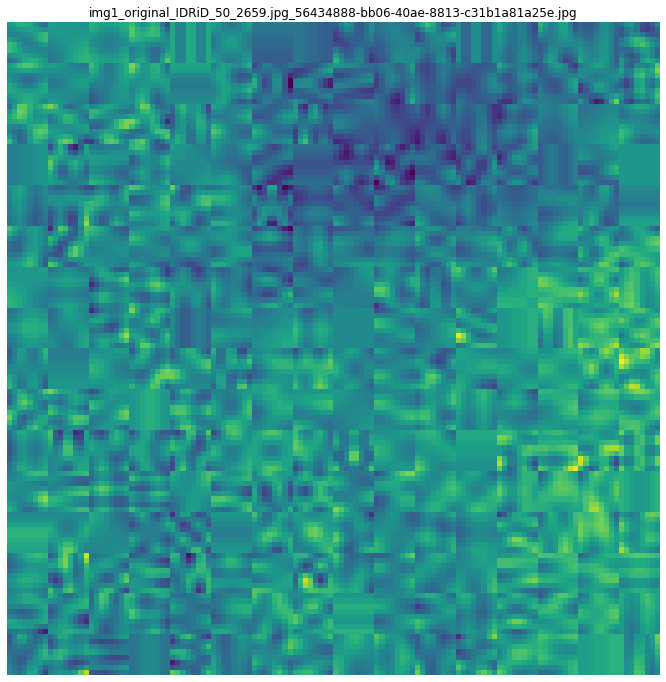

 0 images processed...
##### img1_original_IDRiD_50_2659.jpg_9aa32df7-4053-4596-8930-454ab6a7bd03.jpg 16384 (128, 128)
#images[1] n_rows[1] n_cols[1] print_size[12]


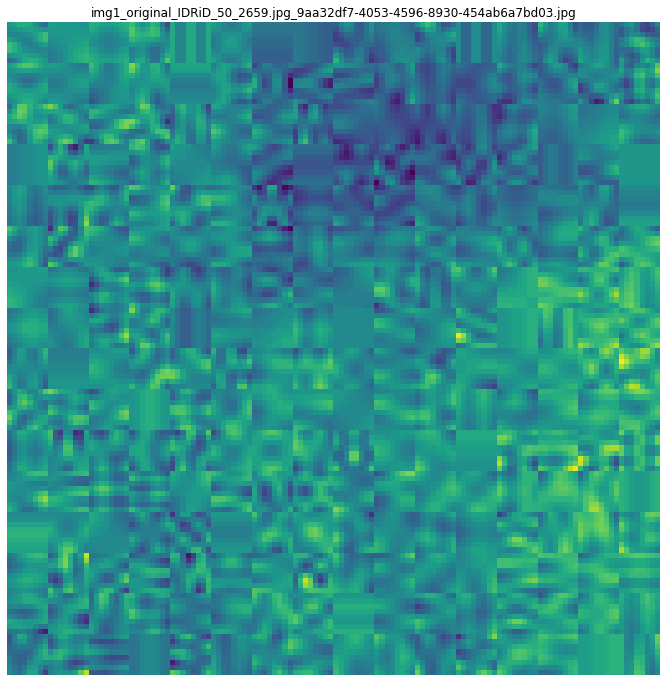

##### img1_original_IDRiD_50_2659.jpg_029d23f3-2f11-49b7-b69d-8a9e43ecff00.jpg 16384 (128, 128)
#images[1] n_rows[1] n_cols[1] print_size[12]


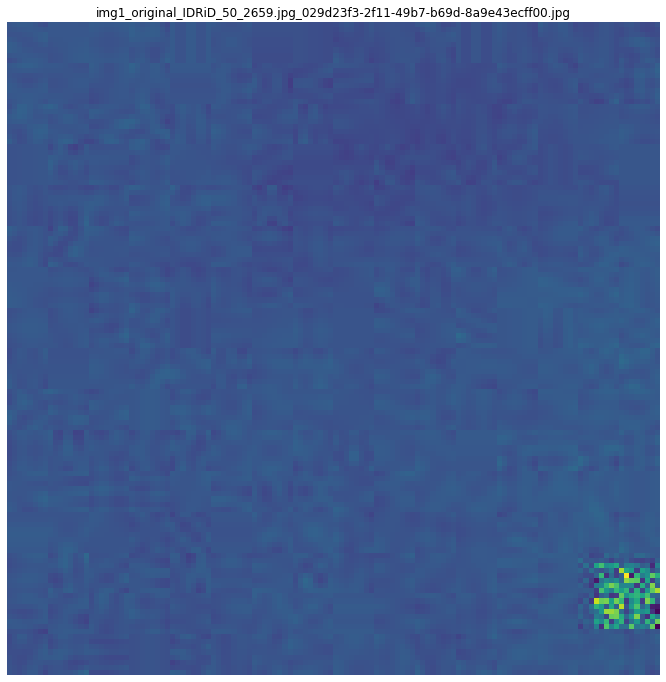

##### img1_original_IDRiD_50_2659.jpg_a458b1ac-0837-4aeb-b149-ac88f5ea9b1b.jpg 16384 (128, 128)
#images[1] n_rows[1] n_cols[1] print_size[12]


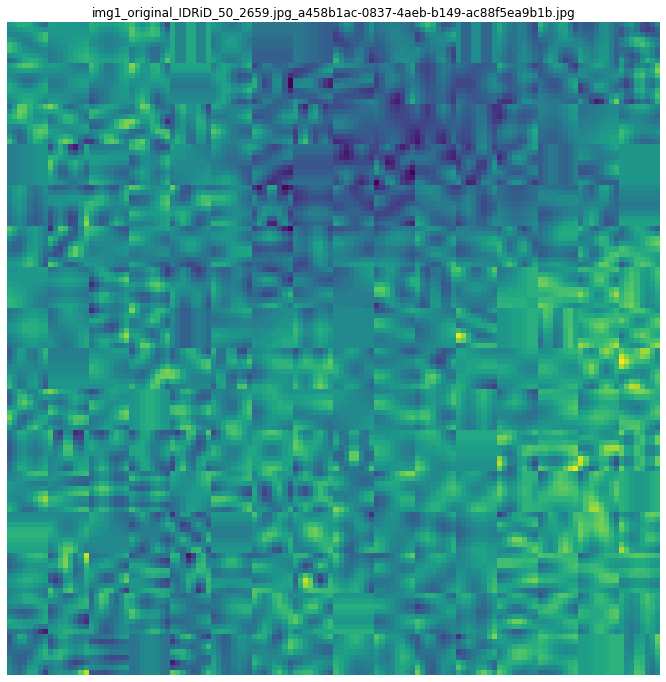

##### img1_original_IDRiD_50_2659.jpg_b1167539-837a-4d01-b78a-209bb42331d8.jpg 16384 (128, 128)
#images[1] n_rows[1] n_cols[1] print_size[12]


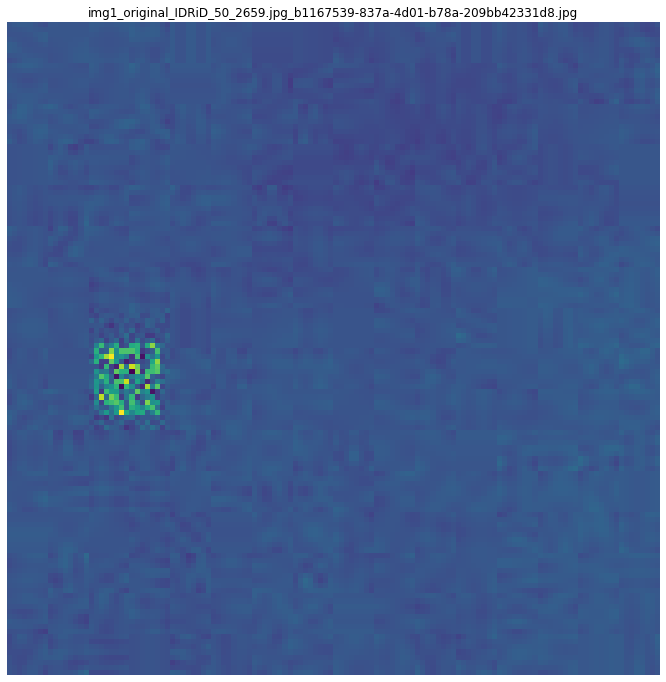

##### img1_original_IDRiD_50_2659.jpg_ebb0e2f5-121a-4bef-ad18-4bdc5beff8e8.jpg 16384 (128, 128)
#images[1] n_rows[1] n_cols[1] print_size[12]


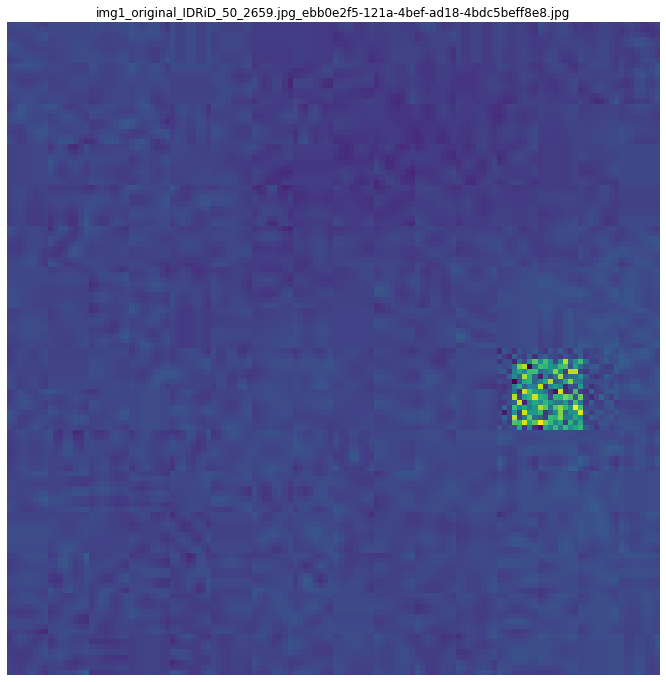

##### img1_original_IDRiD_50_2659.jpg_63e9708d-9716-408e-9a89-592fb871cf6d.jpg 16384 (128, 128)
#images[1] n_rows[1] n_cols[1] print_size[12]


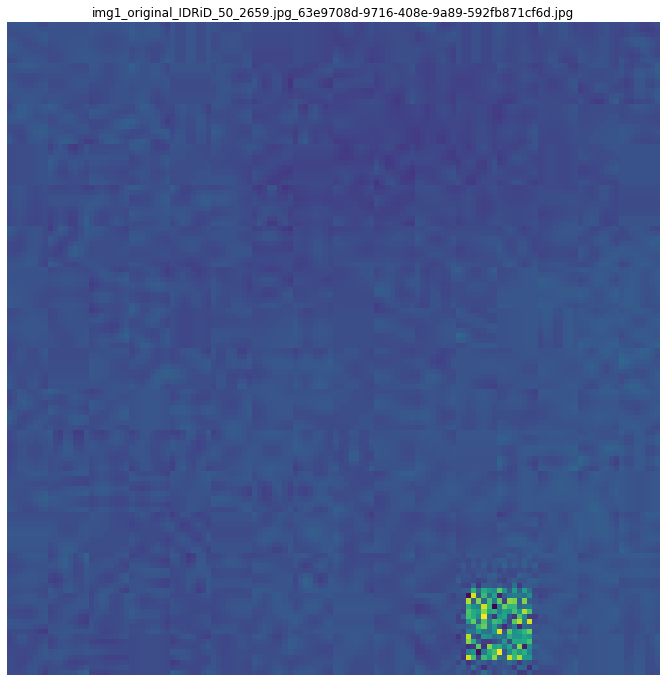

##### img1_original_IDRiD_50_2659.jpg_67b22e1a-be94-4b29-a774-ee72d483fabd.jpg 16384 (128, 128)
#images[1] n_rows[1] n_cols[1] print_size[12]


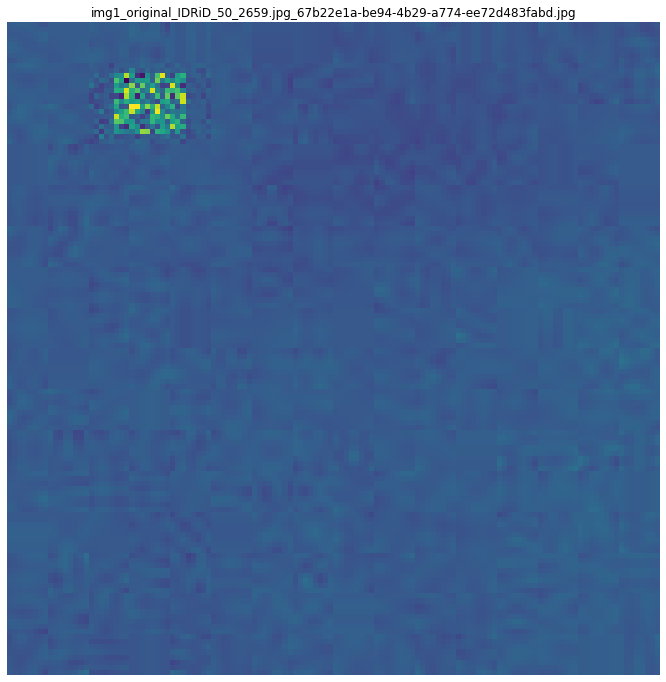

##### img1_original_IDRiD_50_2659.jpg_c81603b6-fcfb-425a-b875-d71f991e1c5a.jpg 16384 (128, 128)
#images[1] n_rows[1] n_cols[1] print_size[12]


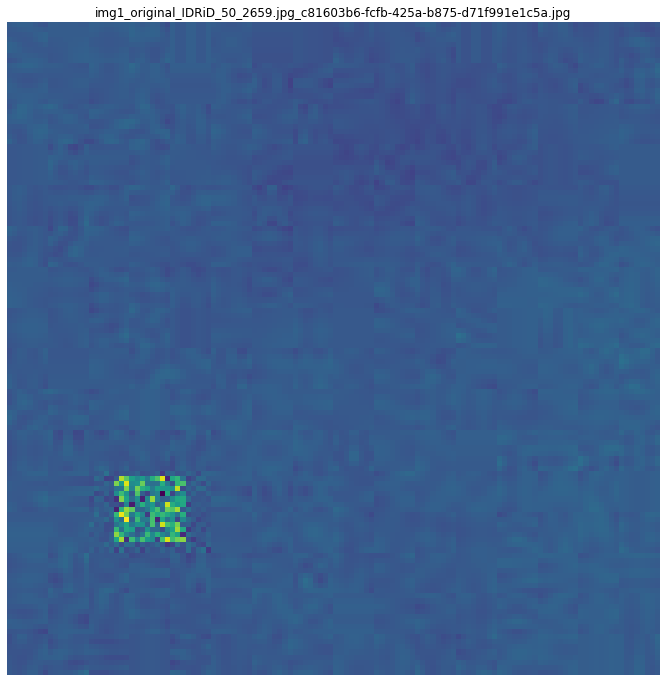

##### img1_original_IDRiD_50_2659.jpg_85c094f9-8c9e-465c-9b99-fe38fdc9572b.jpg 16384 (128, 128)
#images[1] n_rows[1] n_cols[1] print_size[12]


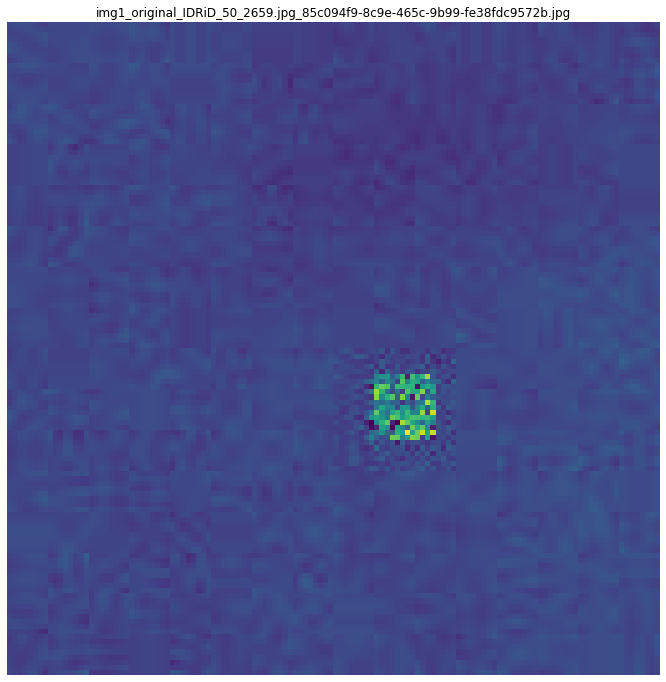

In [221]:

   
def data_aug():
    images = []
    img_names = []
    image_dir = 'img1'
    gt_dir = 'gt1'
    update_flag = False
    graph_flag = False
    '''
    for patch_id in patch_ids:
        #print(img_id,patch_id)
        img_name = img_id + '_' + str(patch_id)
        oi_im = get_img_from_npy( imgdir + 'images/' + img_name + '.npy')
        images.append(oi_im.astype(np.uint8))
        img_names.append(img_name)
    '''

    p = Augmentor.Pipeline( imgdir + image_dir)
    #p.ground_truth( imgdir + gt_dir)
    
    # First, we add a horizontal flip operation to the pipeline:
    #p.flip_left_right(probability=0.4)

    # Now we add a vertical flip operation to the pipeline:
    #p.flip_top_bottom(probability=0.8)

    # Add a rotate90 operation to the pipeline:
    #p.rotate90(probability=0.1)

    # Zoom
    #p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
    #p.zoom_random(probability=1, percentage_area=.7, randomise_percentage_area=True)
    #p.flip_top_bottom(probability=1)
    #p.random_distortion(probability=1, grid_width=20, grid_height=20, magnitude=8)
    #p.crop_random(probability=1, percentage_area=1)
    p.random_erasing(probability=.5, rectangle_area=0.11)
    #p.resize(probability=1, width=128, height=128)
    #p.resize(probability=1.0, width=120, height=120)

    p.sample(10,multi_threaded=True)
    #p.process()
    #print(len(augmented_images),len(labels),type(augmented_images))
    
    odir = imgdir + image_dir + '/output/'
    da_image_dir = imgdir + 'da_img/'
    da_gt_dir = imgdir + 'da_gt/'
    o_file_pattern = '*_original_*'
    gt_file_pattern = '*_groundtruth_*'
    files = os.listdir(odir)
    m_files = []
    i=0
    for filename in files:
        #if i > 3:
        #    break
        #print(fnmatch.fnmatch(filename, file_pattern))
        #print(filename)
        '''
        '_groundtruth_(1)_img1_IDRiD_50_2659.jpg_e336bef0-f6c1-4342-8b5e-b45116c22743.jpg'
         img1_original_IDRiD_50_2659.jpg_031288ab-4d12-4a32-8c64-b36d0d0a2748.jpg

        '''
        o_img_fl = filename        
        if update_flag:
            if fnmatch.fnmatch(filename, o_file_pattern):
                m = re.findall('^.*?_(IDRiD_.*?)\.jpg_(.*?\.jpg)$',filename)            
                if m:
                    #print(m[0][0],m[0][1])
                    t_f_name = m[0][0] + '_' + m[0][1]
                    shutil.move(odir + o_img_fl,da_image_dir + t_f_name)
                #o_img = plt.imread( odir + o_img_fl)
            if fnmatch.fnmatch(filename, gt_file_pattern):
                m = re.findall('^.*?_(IDRiD_.*?)\.jpg_(.*?\.jpg)$',filename)            
                if m:
                    #print(m[0][0],m[0][1])
                    t_f_name = m[0][0] + '_' + m[0][1]
                    shutil.move(odir + o_img_fl,da_gt_dir + t_f_name)
        else:
            #print("o_file_pattern matched...shape is ",o_img.shape)
            o_img = io.imread( odir + o_img_fl, as_gray=True)
            print("#####",o_img_fl,o_img.size,o_img.shape)
            show_image_grid([o_img], [o_img_fl], img_per_row=1)

            images.append(o_img)
            img_names.append(o_img_fl)
            if graph_flag:
                if len(o_img.shape) > 2:
                    for j in range(o_img.shape[2]):
                        Z = o_img[:,:,j]
                        if o_img.shape[0] < o_img.shape[1]:
                          Z = Z.transpose((1,0))
                        plot_3d(Z,w=o_img.shape[0],h=o_img.shape[1],title=str(j))
                else:
                    plot_3d(Z=o_img,w=o_img.shape[0],h=o_img.shape[1],title='Greyscale=')
            '''
            if fnmatch.fnmatch(filename, file_pattern):
               o_img_fl = filename
               images.append(plt.imread(odir + o_img_fl))
               img_names.append(o_img_fl)

               gt_img_fl = '_groundtruth_(1)_' + filename 
               images.append(plt.imread(odir + gt_img_fl))
               img_names.append(gt_img_fl)
            '''
        
        if i % 1000 == 0:
            print(" %d images processed..." % (i))
        i += 1
        
    #show_image_grid(images, img_names, img_per_row=1)
    #show_image_grid(images[4:], img_names, img_per_row=1)

    
indexs = [4392,2138,4393,4473,2139,2058,4551,2137,4472,4552,4391,2059,4394,127]
indexs_78 = [2929, 1820, 3647, 1660, 3007, 3484, 3404, 3648, 1902, 1901, 1822]
indexs_50 = [2659,1744,2342,2501]
#check_patches('IDRiD_50',indexs_50[:4],pi=False)
data_aug()


49152 (128, 128, 3)


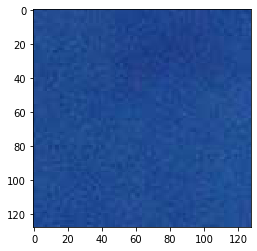

In [186]:
#i1 = plt.imread("/disk1/data1/data/px_he2/gt/IDRiD_76_100_0c808908-46a6-4a13-88eb-ba8f4492d6b1.jpg")
i1 = plt.imread("/disk1/data1/data/px_he1/img1/output/img1_original_IDRiD_50_2659.jpg_21421f3a-e6a9-4107-9b00-9110658155b3.jpg")
#i1 = plt.imread("/disk1/data1/data/px_he2/images/IDRiD_76_100.jpg")
print(i1.size,i1.shape)
plt.imshow(i1)